<a href="https://colab.research.google.com/github/dimsdika12/Analyzing-User-Behavior-Divvy-Bike-2023/blob/main/EDA_Divvy_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing User Behavior Divvy Bike in  2023**

**Project objectives :** The analysis of Divvy Bike Rentals user behavior aims to provide comprehensive understanding to stakeholders. It is intended to support strategic decision-making, develop more effective marketing strategies, and evaluate overall business performance. With a better understanding of user preferences, trends, and behavior patterns, stakeholders can make more informed decisions and improve the performance of Divvy Bike Rentals business.


Defining  Questions

1. What's the proportion of yearly members (member) versus daily users (casual) in using the bike rental service?

2. How is bike usage divided by type in terms of percentage?

3. What's the typical length of bike rentals on average?

4. How did bike rental numbers change (trend) throughout 2023?

5. Do the number of bike rentals vary significantly across different days of the week?

6. What are the busiest and quietest times for bike rentals?

Import Dataset

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json   # change with your kaggle api

In [2]:
!kaggle datasets download -d dimasamardika/divvy-bike-trip-2023

 95% 196M/205M [00:01<00:00, 96.0MB/s]
100% 205M/205M [00:01<00:00, 110MB/s] 


Extract Dataset

In [3]:
# Extract the zip file
import zipfile, os
local_zip = '/content/divvy-bike-trip-2023.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/extract')
zip_ref.close()

Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Dataset

In [5]:
df01  = pd.read_csv("/content/extract/202301-divvy-tripdata.csv")
df02  = pd.read_csv("/content/extract/202302-divvy-tripdata.csv")
df03  = pd.read_csv("/content/extract/202303-divvy-tripdata.csv")
df04  = pd.read_csv("/content/extract/202304-divvy-tripdata.csv")
df05  = pd.read_csv("/content/extract/202305-divvy-tripdata.csv")
df06  = pd.read_csv("/content/extract/202306-divvy-tripdata.csv")
df07  = pd.read_csv("/content/extract/202307-divvy-tripdata.csv")
df08  = pd.read_csv("/content/extract/202308-divvy-tripdata.csv")
df09  = pd.read_csv("/content/extract/202309-divvy-tripdata.csv")
df10  = pd.read_csv("/content/extract/202310-divvy-tripdata.csv")
df11  = pd.read_csv("/content/extract/202311-divvy-tripdata.csv")
df12  = pd.read_csv("/content/extract/202312-divvy-tripdata.csv")

Prepare and Assessing Dataset

In [6]:
all_dataframes = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12]
for cnt_row in all_dataframes:
  print(cnt_row.shape)

(190301, 13)
(190445, 13)
(258678, 13)
(426590, 13)
(604827, 13)
(719618, 13)
(767650, 13)
(771693, 13)
(666371, 13)
(537113, 13)
(362518, 13)
(224073, 13)


In [7]:
total_cnt = sum([cnt_row.shape[0] for cnt_row in all_dataframes])
total_cnt

5719877

In [8]:
merge_df = pd.concat(all_dataframes, ignore_index=True)

In [9]:
merge_df.shape

(5719877, 13)

In [10]:
merge_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [11]:
merge_df.duplicated().sum()

0

In [13]:
merge_df.nunique()

ride_id               5719877
rideable_type               3
started_at            4823909
ended_at              4835702
start_station_name       1592
start_station_id         1516
end_station_name         1597
end_station_id           1520
start_lat              789702
start_lng              748738
end_lat                 13884
end_lng                 14002
member_casual               2
dtype: int64

> *Note :*  "From this observation, it is evident that the count of unique values in ride_id equals the number of rows. Hence, ride_id can be considered as a potential primary key."









In [14]:
merge_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

"Note: As we do not utilize the columns `[start_station_name, end_station_name, start_station_id, end_station_id, end_lat, end_lng]`, any missing values in these columns can be disregarded. Subsequently, we have the option to eliminate these columns."

In [15]:
# drop unused columns
columns_to_drop = ['start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng']
merge_df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [16]:
merge_df.sample(3)

,ride_id,rideable_type,started_at,ended_at,member_casual
296356,CB00C2DE5E97AA17,classic_bike,2023-02-17 14:16:10,2023-02-17 14:26:22,casual
508519,436EA39489BDE424,classic_bike,2023-03-16 15:52:44,2023-03-16 15:58:06,casual
773578,D9651AF601AA40AD,electric_bike,2023-04-27 06:52:52,2023-04-27 07:04:33,member


Transforming Dataset

In [17]:
# Convert the data type of 'started_at' and 'ended_at' to datetime.
merge_df['started_at'] = pd.to_datetime(merge_df['started_at'])
merge_df['ended_at'] = pd.to_datetime(merge_df['ended_at'])
# Add new columns by splitting 'started_at' into separate columns for 'date' and 'hour'.
# Add column 'day_name'
merge_df['date'] = pd.to_datetime(merge_df['started_at'].dt.date)
merge_df['hour'] = merge_df['started_at'].dt.hour
merge_df['day_name'] = merge_df['started_at'].dt.day_name()

In [18]:
#Add new columns 'duration' represents the result of subtracting 'ended_at' from 'started_at'
merge_df['duration_menit'] = (merge_df['ended_at'] - merge_df['started_at']).dt.total_seconds() / 60

In [19]:
merge_df.dtypes

ride_id                   object
rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
member_casual             object
date              datetime64[ns]
hour                       int64
day_name                  object
duration_menit           float64
dtype: object

In [20]:
merge_df.sample(3)

,ride_id,rideable_type,started_at,ended_at,member_casual,date,hour,day_name,duration_menit
5558937,26DDB729F7F05CAF,classic_bike,2023-12-04 12:17:28,2023-12-04 12:23:05,member,2023-12-04,12,Monday,5.616667
2067603,9928F4CC922A8EEC,classic_bike,2023-06-16 09:54:19,2023-06-16 10:30:27,casual,2023-06-16,9,Friday,36.133333
146574,F0854CAC65BC4B73,electric_bike,2023-01-23 07:01:33,2023-01-23 07:06:41,member,2023-01-23,7,Monday,5.133333


In [21]:
# rename columns
merge_df.rename(columns={'rideable_type': 'bike_type', 'member_casual': 'member_type'}, inplace=True)

In [22]:
merge_df.sample(3)

,ride_id,bike_type,started_at,ended_at,member_type,date,hour,day_name,duration_menit
2452604,5BC1127B7EE2F616,electric_bike,2023-07-16 18:43:58,2023-07-16 19:39:25,casual,2023-07-16,18,Sunday,55.45
135327,54B554965EF144EC,classic_bike,2023-01-17 16:30:41,2023-01-17 16:47:53,member,2023-01-17,16,Tuesday,17.20
2269229,EC6B2F62633B04CF,electric_bike,2023-06-03 12:39:36,2023-06-03 12:48:24,member,2023-06-03,12,Saturday,8.80


In [23]:
merge_df['member_type'].unique()

array(['member', 'casual'], dtype=object)

In [24]:
merge_df['bike_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

Note: As of September 2023, docked bike services are no longer in operation.

## Question 1 :
1. What's the proportion of yearly members (member) versus daily users (casual) in using the bike rental service?

In [25]:
total_rides_by_member_type = merge_df.groupby('member_type')['ride_id'].count().reset_index(name='total')

In [26]:
total_rides_by_member_type

,member_type,total
0,casual,2059179
1,member,3660698


In [ ]:
# Export CSV
total_rides_by_member_type.to_csv('/content/csv_output/dashboard_p1.csv', index=False)

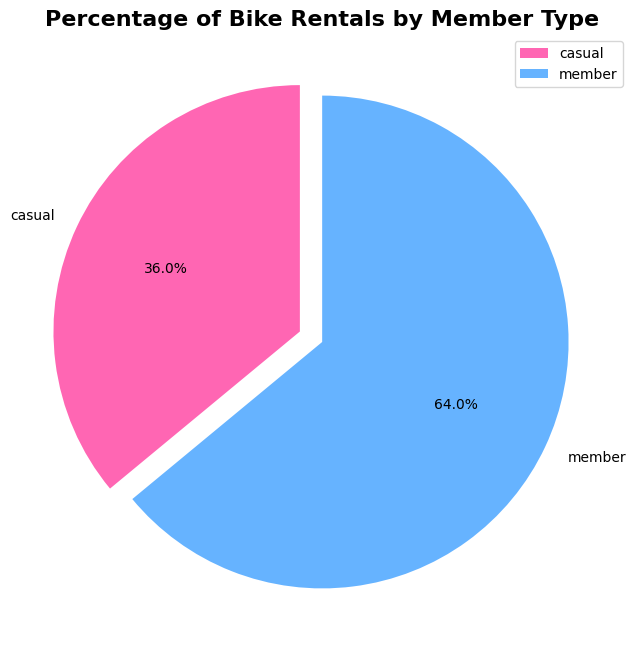

In [27]:
#Plot Chart
plt.figure(figsize=(8, 8))
colors = ['#ff66b3', '#66b3ff']
explode = (0.1, 0)
plt.pie(total_rides_by_member_type['total'], labels=total_rides_by_member_type['member_type'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Bike Rentals by Member Type', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

Insight: In 2023, Divvy recorded a total of 5,719,877 bike rentals. About 64%, or around 3.7 million users, were members, while the remaining 36%, totaling 2 million rentals, came from casual users.

## Question 2 :   

2. How is bike usage divided by type in terms of percentage?

In [28]:
bike_type_usage = merge_df.groupby('bike_type')['ride_id'].count().reset_index(name='total')

In [29]:
bike_type_usage

,bike_type,total
0,classic_bike,2696011
1,docked_bike,78287
2,electric_bike,2945579


In [ ]:
#Export CSV
bike_type_usage.to_csv('/content/csv_output/dashboard_p2.csv', index=False)

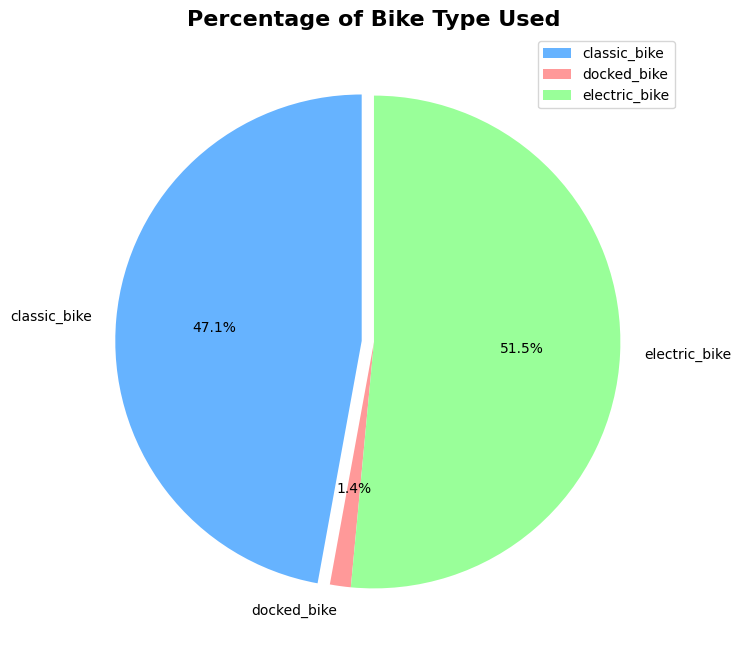

In [30]:
#Plot Chart
plt.figure(figsize=(10, 8))

colors = ['#66b3ff','#ff9999', '#99ff99']

explode = (0.05, 0, 0)

plt.pie(bike_type_usage['total'], labels=bike_type_usage['bike_type'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Bike Type Used', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [31]:
bike_type_used_by_member = merge_df.groupby(['member_type','bike_type'])['ride_id'].count().reset_index(name='total')

In [32]:
total_rides_by_member_type = bike_type_used_by_member.groupby('member_type')['total'].sum().reset_index(name='total_rides')
bike_type_used_by_member = pd.merge(bike_type_used_by_member, total_rides_by_member_type, on='member_type')
bike_type_used_by_member['percentage'] = (bike_type_used_by_member['total'] / bike_type_used_by_member['total_rides']) * 100

In [33]:
bike_type_used_by_member

,member_type,bike_type,total,total_rides,percentage
0,casual,classic_bike,876881,2059179,42.584010
1,casual,docked_bike,78287,2059179,3.801855
2,casual,electric_bike,1104011,2059179,53.614135
3,member,classic_bike,1819130,3660698,49.693528
4,member,electric_bike,1841568,3660698,50.306472


In [ ]:
#Export CSV
bike_type_used_by_member.to_csv('/content/csv_output/dashboard_p2_1.csv', index=False)

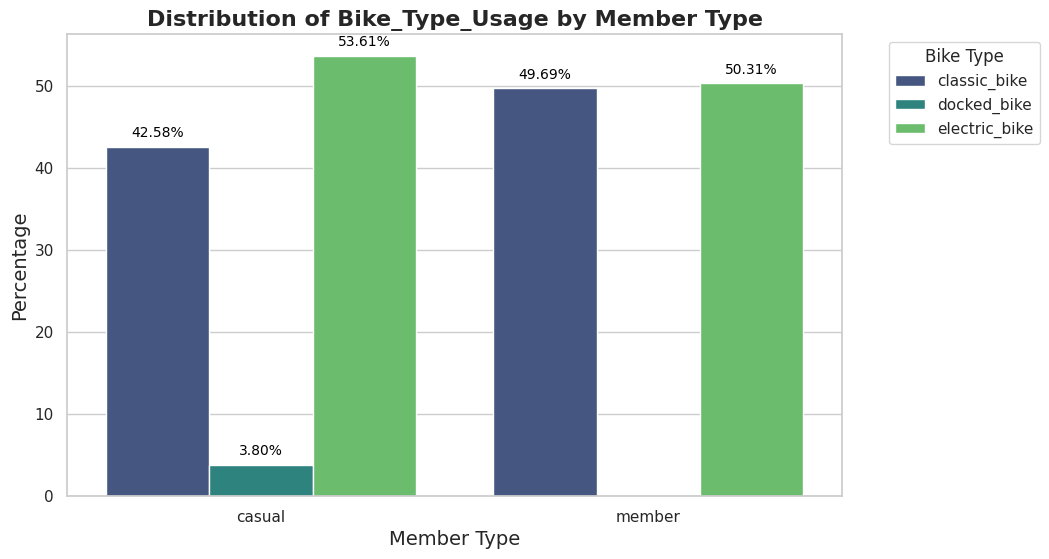

In [34]:
#Plot Chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='member_type', y='percentage', hue='bike_type', data=bike_type_used_by_member, palette='viridis')

plt.title('Distribution of Bike_Type_Usage by Member Type', fontsize=16, fontweight='bold')
plt.xlabel('Member Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

for p in plt.gca().patches:
    percentage_value = p.get_height()
    if percentage_value != 0:
        plt.gca().annotate(f'{percentage_value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                           textcoords='offset points')

plt.legend(title='Bike Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Insight :
- Electric bikes contribute the highest percentage of bike usage, accounting for 51.5%, followed by classic bikes at 47.1%, while docked bikes make up the remaining 3.8%.
- Further breaking down the analysis, the distribution of bike types among member types reveals that for casual riders, 53.61% prefer electric bikes, 42.58% prefer classic bikes, and the remaining 3.80% choose docked bikes. On the other hand, for members, 50.31% prefer electric bikes, and 49.69% prefer classic bikes.
- Casual riders show a 3% higher preference for electric bikes compared to member riders.
- On the contrary, member riders exhibit a 7% higher preference for classic bikes compared to casual riders

Note: Based on the available data, as of September 2023, there are no longer docked bike types available in Divvy's service. As of January 2024, Divvy offers three types of bikes: Classic, Scooter, and Ebike.

## Question 3:  

What's the typical length of bike rentals on average?

In [35]:
avg_duration = merge_df.groupby('member_type')['duration_menit'].mean().reset_index(name='avg_duration')

In [36]:
avg_duration = merge_df.query('bike_type in ["classic_bike","electric_bike"]').groupby(['member_type','bike_type'])['duration_menit'].mean().reset_index(name='avg_duration')

In [37]:
avg_duration

,member_type,bike_type,avg_duration
0,casual,classic_bike,32.012008
1,casual,electric_bike,14.254109
2,member,classic_bike,13.907741
3,member,electric_bike,11.135583


In [ ]:
#Export csv
avg_duration.to_csv('/content/csv_output/dashboard_p3.csv', index=False)

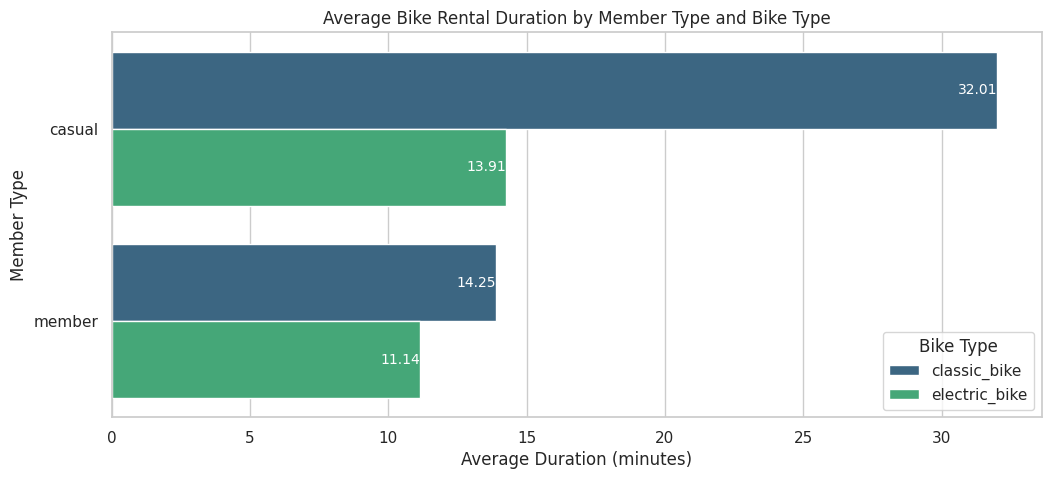

In [38]:
# Plot chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Bar Plot Horizontal
ax = sns.barplot(x='avg_duration', y='member_type', hue='bike_type', data=avg_duration, palette="viridis")

# Atur lebar bar
for bar, label in zip(ax.patches, avg_duration['avg_duration']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label:.2f}',
             va='center', ha='right', color='white', fontsize=10)

plt.title('Average Bike Rental Duration by Member Type and Bike Type')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Member Type')
plt.legend(title='Bike Type')

plt.show()

Insight :
- Casual riders, on average, spend 32 minutes using electric bikes and 14 minutes using classic bikes. In contrast, member riders have an average duration of 14 minutes for classic bikes and 11 minutes for electric bikes.
- Overall, casual riders spend more time on bike rentals than member riders, whether using classic bikes or electric bikes. However, when it comes to classic bikes, casual riders significantly spend more time (32 minutes) compared to member riders (14 minutes).
- In summary, despite the higher number of electric bike users compared to classic bikes, the average duration suggests that both casual and member riders spend more time using classic bikes. This insight highlights the preference for longer rides on classic bikes among both rider types, despite the popularity of electric bikes in terms of user numbers.

## Question 4 :

How did bike rental numbers change (trend) throughout 2023?

In [39]:
daily_rent = merge_df.groupby('date')['ride_id'].count().reset_index(name='total')

In [40]:
daily_rent

,date,total
0,2023-01-01,5135
1,2023-01-02,5507
2,2023-01-03,5127
3,2023-01-04,7261
4,2023-01-05,6572
...,...,...
360,2023-12-27,6006
361,2023-12-28,3891
362,2023-12-29,4881
363,2023-12-30,5079


In [ ]:
#Export CSV
daily_rent.to_csv('/content/csv_output/dashboard_p4.csv', index=False)

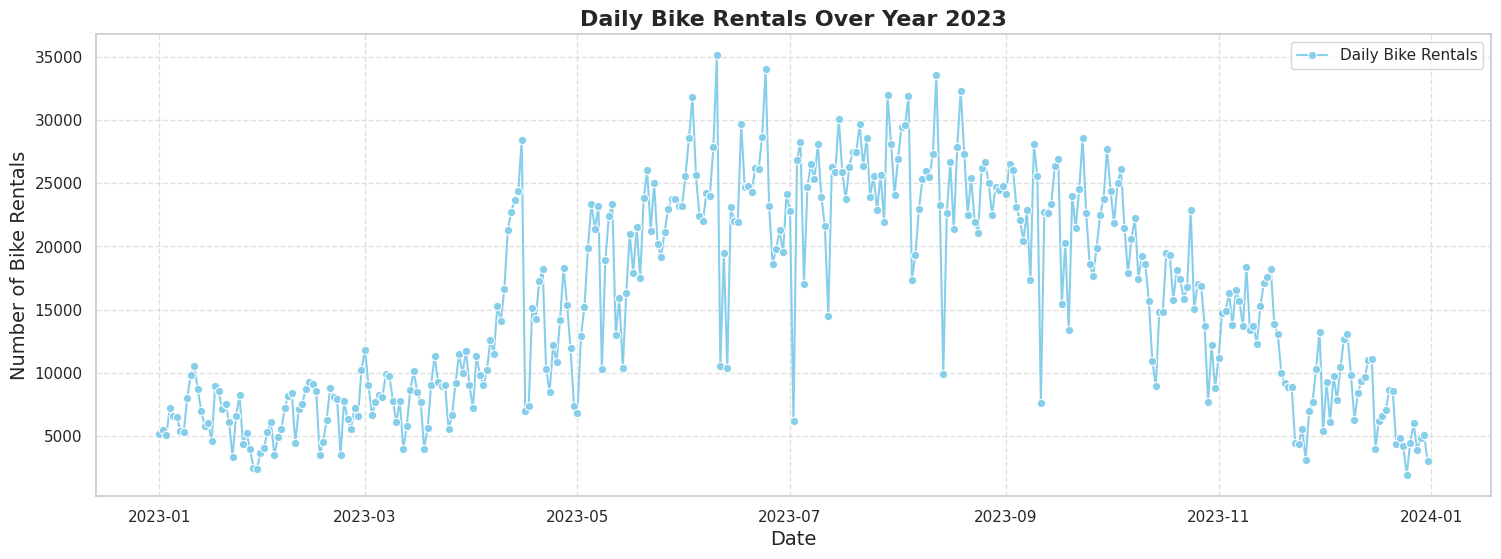

In [41]:
# Plot Chart
plt.figure(figsize=(18, 6))
sns.lineplot(x='date', y='total', data=daily_rent, marker='o', color='skyblue', label='Daily Bike Rentals')


plt.title('Daily Bike Rentals Over Year 2023', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Bike Rentals', fontsize=14)


plt.grid(True, linestyle='--', alpha=0.6)


plt.legend()


plt.show()

In [42]:
# Ekstrak bulan dari kolom tanggal
daily_rent['month'] = pd.to_datetime(daily_rent['date']).dt.to_period('M')
# Menghitung rata-rata per bulan
avg_rentals_per_month = daily_rent.groupby('month')['total'].sum().reset_index()

In [43]:
# Mengganti label bulan dengan nama bulan
month_names = avg_rentals_per_month['month'].dt.strftime('%b')
avg_rentals_per_month['month'] = month_names

In [44]:
avg_rentals_per_month

,month,total
0,Jan,190301
1,Feb,190445
2,Mar,258678
3,Apr,426590
4,May,604827
5,Jun,719618
6,Jul,767650
7,Aug,771693
8,Sep,666371
9,Oct,537113


<ipython-input-45-253e14d194c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total', data=avg_rentals_per_month, palette='viridis')


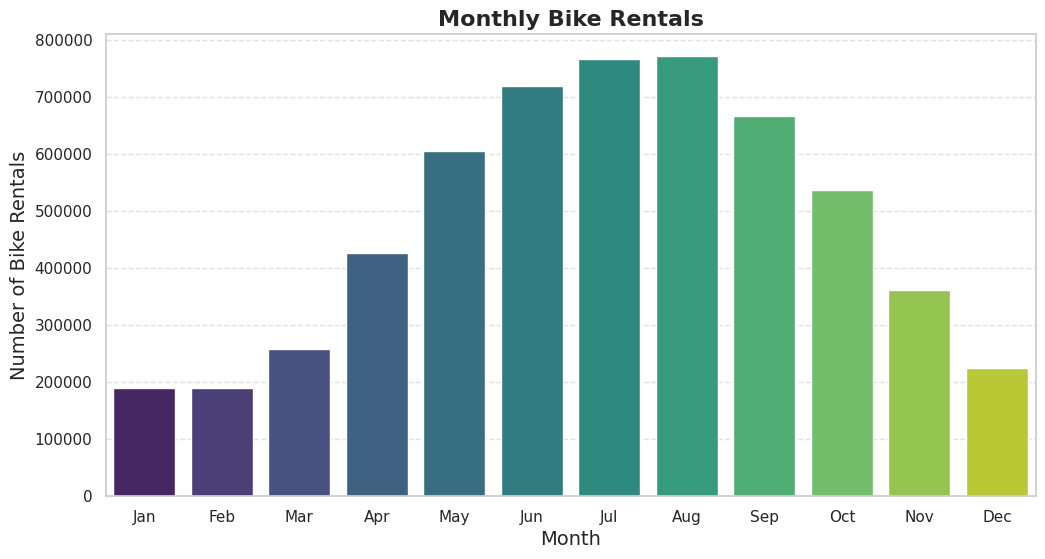

In [45]:
plt.figure(figsize=(12, 6))
# Plot bar chart
sns.barplot(x='month', y='total', data=avg_rentals_per_month, palette='viridis')

# Menambahkan title dan label pada sumbu
plt.title('Monthly Bike Rentals', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bike Rentals', fontsize=14)

# Menampilkan grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Menampilkan chart
plt.show()


Insight:

- Divvy bike usage follows a clear seasonal trend, heavily influenced by the weather. More people opt for bike rentals during the spring and summer months, reaching its peak in August with an astounding 771.693 Monthly Bike Rentals. On the other side, during fall and winter, there's a significant drop in user numbers, hitting the lowest point in January with approximately 190.301 Monthly Bike Rentals.

Note:
- Fall Season: September 23–December 20
- Winter Season: December 21–March 20
- Spring Season: March 21–June 20
- Summer Season: June 21–September 22

## Question 5 :    
Do the number of bike rentals vary significantly across different days of the week?

In [47]:
daily_ride_by_day = merge_df.groupby(['day_name','member_type'])['ride_id'].count().reset_index(name='total')

In [48]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ride_by_day['day_name'] = pd.Categorical(daily_ride_by_day['day_name'], categories=days_order, ordered=True)
daily_ride_by_day = daily_ride_by_day.sort_values(by='day_name')

In [49]:
daily_ride_by_day

,day_name,member_type,total
2,Monday,casual,234828
3,Monday,member,494576
10,Tuesday,casual,246224
11,Tuesday,member,576754
12,Wednesday,casual,249166
13,Wednesday,member,586459
8,Thursday,casual,270612
9,Thursday,member,589590
0,Friday,casual,311925
1,Friday,member,531599


In [ ]:
#Export CSV
daily_ride_by_day.to_csv('/content/csv_output/dashboard_p5.csv', index=False)

<Figure size 1200x600 with 0 Axes>

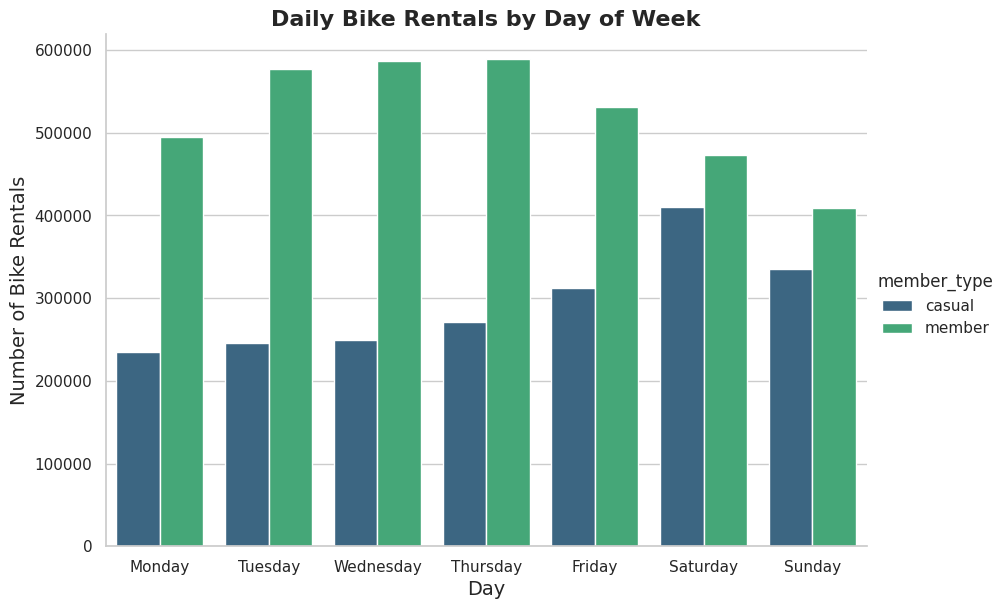

In [50]:
#Plot Chart
plt.figure(figsize=(12, 6))
sns.catplot(x='day_name', y='total', hue='member_type', data=daily_ride_by_day, kind='bar', palette="viridis", height=6, aspect=1.5)

plt.title('Daily Bike Rentals by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Bike Rentals', fontsize=14)

plt.show()

Insight:
- The analysis of daily bike rentals by day of the week reveals distinct patterns between member and casual riders. Member riders exhibit higher activity levels on weekdays, with a noticeable decline during the weekend. Conversely, casual riders are more active during the weekend, particularly on Fridays, which emerges as their peak usage day. This highlights a contrasting usage behavior, with members preferring weekdays and casual riders favoring weekends, particularly Fridays.

## Question 6 :     
What are the busiest and quietest times for bike rentals?

In [51]:
ride_by_hour = merge_df.groupby(['hour', 'member_type'])['ride_id'].count().reset_index(name='total')

In [52]:
ride_by_hour

,hour,member_type,total
0,0,casual,36896
1,0,member,35534
2,1,casual,23929
3,1,member,21185
4,2,casual,14456
5,2,member,12275
6,3,casual,7944
7,3,member,7936
8,4,casual,5969
9,4,member,8778


In [ ]:
#Export CSV
ride_by_hour.to_csv('/content/csv_output/dashboard_p6.csv', index=False)

<Figure size 1200x600 with 0 Axes>

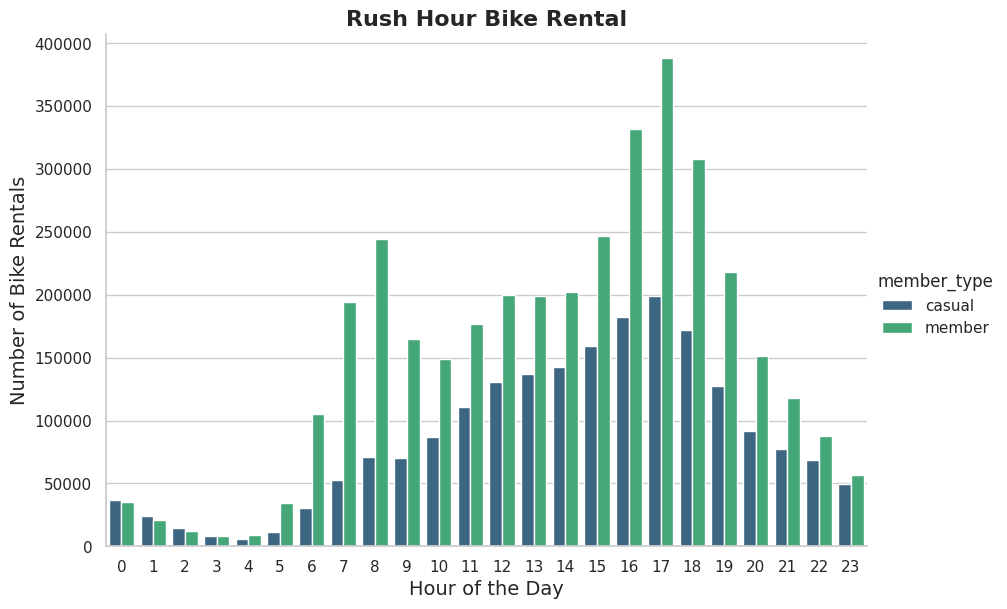

In [53]:
#Plot Chart
plt.figure(figsize=(12, 6))
sns.catplot(x='hour', y='total', hue='member_type', data=ride_by_hour, kind='bar', palette="viridis", height=6, aspect=1.5)

plt.title('Rush Hour Bike Rental', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Bike Rentals', fontsize=14)

plt.show()

Insight:

- Both casual and member riders are actively renting bikes during the hours of 7 AM to 5 PM, with the peak occurring at 5 PM. Subsequently, bike rentals gradually decline after 5 PM, reaching a low point at 4 AM. However, for member riders, there are two peaks — the first peak occurs at 8 AM, and the second peak is observed at 5 PM.

In [ ]:
import shutil

# Replace 'your_folder_path' with the path of the folder you want to download
folder_path = '/content/csv_output'

# Zip the folder
shutil.make_archive(folder_path, 'zip', folder_path)

# Move the zip file to /content to make it easily downloadable
shutil.move(f'{folder_path}.zip', '/content/download.zip')


'/content/download.zip'